## How to handle Duplicate, Typecasting and EDA on Online Retail file

Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading our data as df

In [95]:
df = pd.read_csv('OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [96]:
df.shape # To see the shape of our data

(541909, 8)

In [97]:
df.dtypes # To see the data types

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [98]:
df.info() # This will show columnwsie any Null values and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Looks like `CustomerID` and `Description` columns have some blank values

In [99]:
# Checking how many Unique customer we have got

len(df['CustomerID'].unique().tolist())

4373

In [100]:
df.describe() # This command takes numercial values in the data and summarizes the data into mean, std and quantiles along with min and max values and counts

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


`Quantity` and `UnitPrice` columns have some negative value

In [101]:
df[df['Quantity'] < 0].value_counts() # Checking those rows where Quantity is less then 0

InvoiceNo  StockCode  Description                         Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
C543611    82483      WOOD 2 DRAWER CABINET WHITE FINISH  -1        2/10/2011 14:38   4.95       17850.0     United Kingdom    4
C538341    22976      CIRCUS PARADE CHILDRENS EGG CUP     -12       12/10/2010 14:03  1.25       15514.0     United Kingdom    3
           22730      ALARM CLOCK BAKELIKE IVORY          -1        12/10/2010 14:03  3.75       15514.0     United Kingdom    3
           22725      ALARM CLOCK BAKELIKE CHOCOLATE      -1        12/10/2010 14:03  3.75       15514.0     United Kingdom    3
C570556    22568      FELTCRAFT CUSHION OWL               -144      10/11/2011 11:10  3.39       16029.0     United Kingdom    2
                                                                                                                              ..
C551388    22902      TOTE BAG I LOVE LONDON              -12       4/28/2011 11:41   2.10       17874

In [102]:
df[df['Quantity'] < 0].value_counts().sum() # Summing the count of Quantity where value is less then 0

8905

In [103]:
round((df[df['Quantity'] < 0].value_counts().sum() / df.shape[0]*100),2) # 1.64% of the Quantity data has negative value 

1.64

In [104]:
print('Duplicate entries in all data set: {}'.format(df.duplicated().sum())) # Checking how many duplicate values are there in the data

Duplicate entries in all data set: 5268


In [105]:
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2)) # Checking the percentage of Duplicate data

1% rows are duplicate.


In [106]:
# We will drop these duplicate values from the data set

In [107]:
df.drop_duplicates(inplace = True)
df.shape

(536641, 8)

We need to change Float to Interger as datatypes

In [108]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

So Columns such as `Unit Price` & `CustomerID` needs to be converted to int64

In [109]:
data = df.copy() # Creating a copy of the data

In [110]:
#df['UnitPrice'] = df['UnitPrice'].astype('int64')
#df['CustomerID'] = df['CustomerID'].astype('int64')
df.dtypes
# Had to change it back to Float as it was rounding the number

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Lets look at Customer ID column

In [111]:
df['CustomerID'].isnull().sum()

135037

In [112]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

 So there are 135037 rows of CustomerID which are blank and 1454 rows of Description column which are blank

In [113]:
print('{}% of CustomerID are blank.'.format(round((df['CustomerID'].isnull().sum()/df.shape[0]*100)),2))

25% of CustomerID are blank.


In [114]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Lets Do some EDA on the data

We observed some 2% of Quantity is negative, lets explore more on that

In [115]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [116]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


One thing we can see is Invoice Number of Quantity where is negative starts with C, Lets remove cancelled invoices

In [117]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]
d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [118]:
df.shape

(536641, 8)

In [119]:
d.shape

(527390, 8)

In [120]:
df.shape[0] - d.shape[0]

9251

Total of 9251 Transactions were cancelled

In [121]:
len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]) # There are 1336 transactions where Quantity is less then 0 and Unit Price is equal to 0

1336

In [122]:
data = df[(df['UnitPrice']> 0) & (df['Quantity']> 0)]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      524878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.0+ MB


## EDA

Lets Add Month, Year, Total_Cost, WeekDay to our data

In [124]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],infer_datetime_format=True)
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['Total_Cost'] = data['Quantity'] * data['UnitPrice']

data.head()

<ipython-input-124-09551633fce4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],infer_datetime_format=True)
<ipython-input-124-09551633fce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['InvoiceDate'].dt.month
<ipython-input-124-09551633fce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,20.34


In [125]:
data.shape

(524878, 12)

Lets check how many orders per month

Text(0.5, 1.0, 'Total Cost By Month')

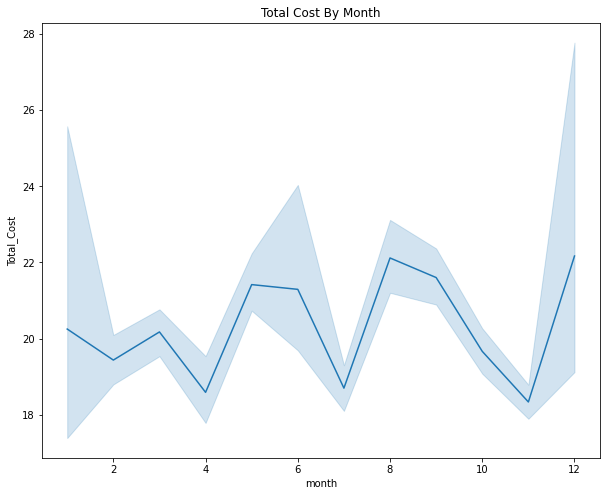

In [134]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month', y= 'Total_Cost', data = data)
plt.title('Total Cost By Month')

Lets see how many sales per weekday

Text(0.5, 1.0, 'Total Sales per WeekDay')

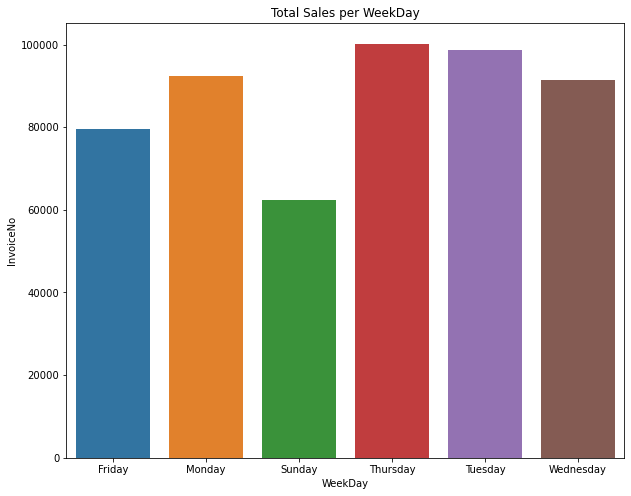

In [141]:
plt.figure(figsize=(10,8))
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count()).reset_index()
sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)
plt.title("Total Sales per WeekDay")

Strange to not see any sales on Saturday

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Cost'>

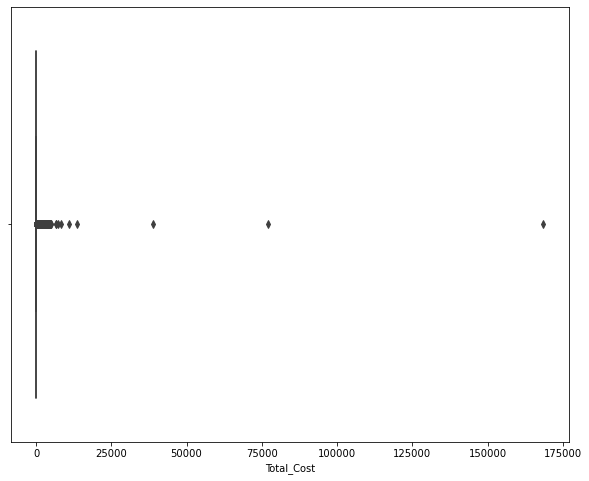

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot(data['Total_Cost'])